## Task No 06:-

#### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

#### Load Dataset

In [2]:
df = pd.read_csv("housing.csv") 

In [3]:
print("Dataset Sample:\n", df.head())

Dataset Sample:
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA

In [4]:
df = df.dropna()


In [20]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


Correlation with target:
 Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


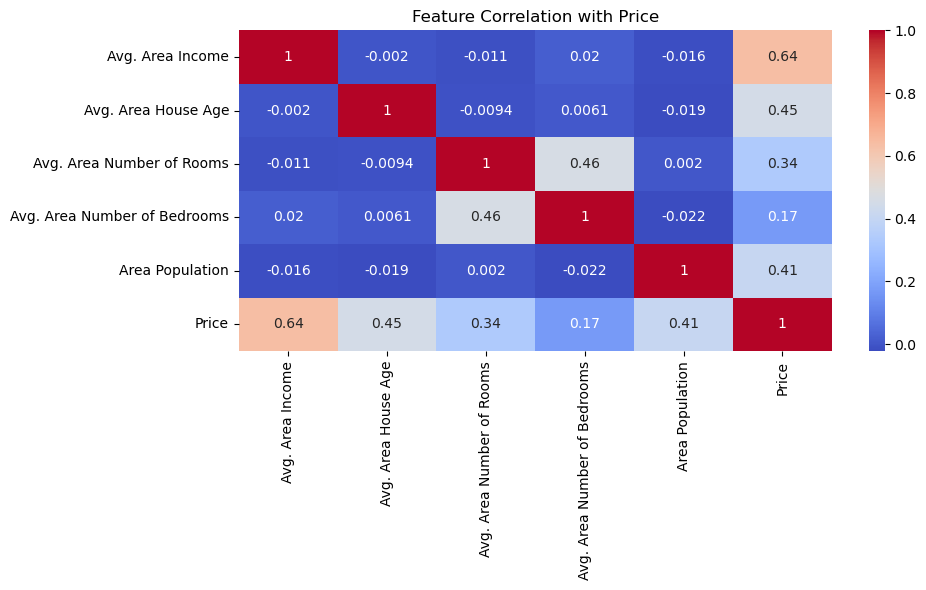

In [9]:
# Drop non-numeric columns for correlation check
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation with target (price)
correlation = numeric_df.corr()
print("Correlation with target:\n", correlation['Price'].sort_values(ascending=False))

# Visualize correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Price")
plt.tight_layout()
plt.show()


In [10]:
features = ["Avg. Area Income" , "Avg. Area House Age" , "Avg. Area Number of Rooms" ,
"Avg. Area Number of Bedrooms","Area Population" ] 
target = 'Price'
X = df[features]
y = df[target]

In [21]:
# Define preprocessors
numeric_features = ["Avg. Area Income" , "Avg. Area House Age" , "Avg. Area Number of Rooms" ,
"Avg. Area Number of Bedrooms","Area Population" ]


In [22]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features)    
])


In [23]:
# Model choice
model = LinearRegression()
# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', model)
])

In [24]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("✅ Model Evaluation:")
print(f"📈 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")

✅ Model Evaluation:
📈 Mean Absolute Error (MAE): 80879.10
📉 Root Mean Squared Error (RMSE): 100444.06


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


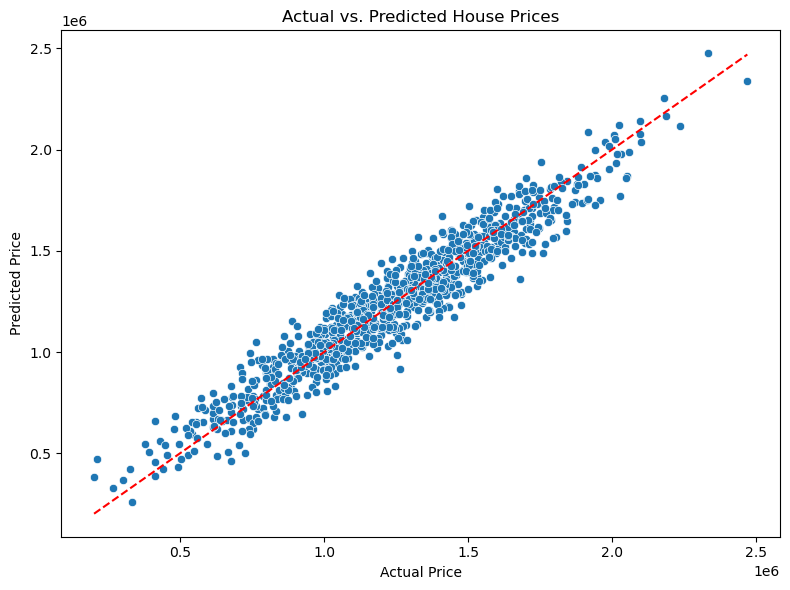

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.tight_layout()
plt.show()

In [27]:
from joblib import dump
dump(pipeline, "model.joblib")
print("✅ Model trained and saved as model.joblib")

✅ Model trained and saved as model.joblib
